In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data=pd.read_csv(r"C:\Users\Home\Downloads\credit_risk_dataset.csv",skipinitialspace=True)

In [3]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
data.shape

(32581, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# checking for duplicates

In [6]:
data[data.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [7]:
data.drop_duplicates(inplace=True)# dropping the duplicates

# Checking for missing values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [9]:
#filling nan values in the person_emp_length
data.person_emp_length.mean()
data.person_emp_length.median()

4.7905103238288556

4.0

In [10]:
x=data.person_emp_length.median()
data.person_emp_length.fillna(x,inplace=True)

In [11]:
#filling nan values in the loan_int_rate column
data.loan_int_rate.mean()
data.loan_int_rate.median()

11.017265100098905

10.99

In [12]:
x=data.loan_int_rate.median()
data.loan_int_rate.fillna(x,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


# outliers

In [14]:
data.skew()

person_age                     2.580490
person_income                 32.958748
person_emp_length              2.668217
loan_amnt                      1.191944
loan_int_rate                  0.220183
loan_status                    1.361172
loan_percent_income            1.063811
cb_person_cred_hist_length     1.659369
dtype: float64

## outliers detection for person_income column

In [15]:
Q1,Q2,Q3=tuple(data.person_income.quantile(q=[0.25,0.50,0.75]))
print(Q1,Q2,Q3)

38542.0 55000.0 79218.0


In [16]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

40676.0 140232.0 -22472.0


### Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mm=MinMaxScaler()
data_Norm=mm.fit_transform(data.person_income.values.reshape(-1,1))

<AxesSubplot:>

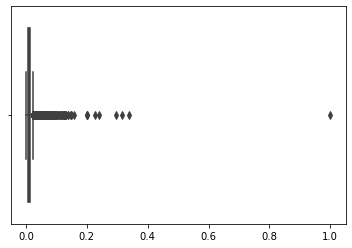

In [18]:
sns.boxplot(data_Norm)

### Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data_Stand=mm.fit_transform(data.person_income.values.reshape(-1,1))

<AxesSubplot:>

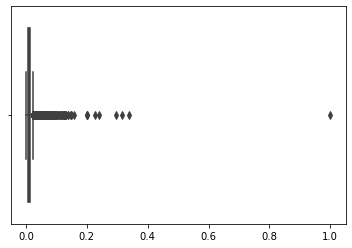

In [20]:
sns.boxplot(data_Stand)

### log transformation

In [21]:
Q1,Q2,Q3=(np.log(data.person_income).quantile(q = [0.25,0.5,0.75]))

In [22]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.7204551105397066 12.36064141309613 9.478820970937305


In [23]:
data[(np.log(data.person_income) > UL) | (np.log(data.person_income)< LL)].index.value_counts()
# In logtransformation there are less outlier detection  compared to cube root transformation

1        1
27846    1
27838    1
27839    1
27840    1
        ..
15944    1
15943    1
15942    1
15941    1
32551    1
Length: 571, dtype: int64

<AxesSubplot:xlabel='person_income'>

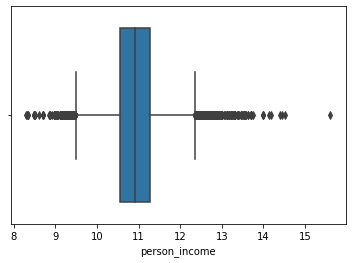

In [24]:
sns.boxplot(np.log(data.person_income)) ## logtransformation as 571 outliiers

### Cube root transformation

In [25]:
Q1, Q2,Q3= (((data.person_income)**(1/3)).quantile(q = [0.25,0.5,0.75]))

In [26]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

9.168995885925483 56.70132960142149 20.02534605771956


In [27]:
data[( ((data.person_income)**(1/3))> UL) | (((data.person_income)**(1/3))< LL)].index.value_counts()

15       1
27854    1
27846    1
27847    1
27848    1
        ..
17905    1
17906    1
17907    1
17910    1
32551    1
Length: 678, dtype: int64

<AxesSubplot:xlabel='person_income'>

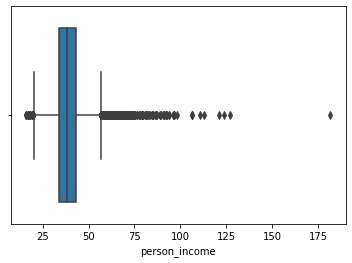

In [28]:
sns.boxplot((data.person_income)**(1/3)) ## cuberoot transformation as 678 ouutliers

### Boxcox transformation

In [29]:
from scipy import stats

In [30]:
x=stats.boxcox(data.person_income)[0] 
y=pd.Series(x)

<AxesSubplot:>

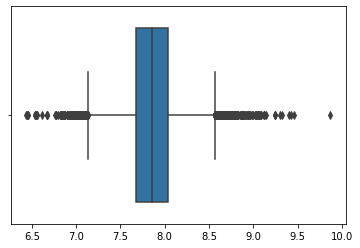

In [31]:
sns.boxplot(y)

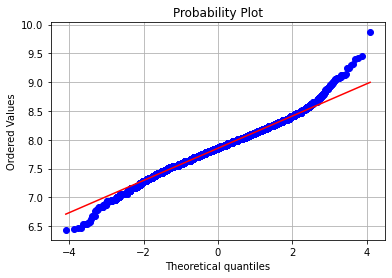

In [32]:
stats.probplot(y, dist="norm", plot=plt)

plt.grid();

In [33]:
Q1, Q2,Q3= (y.quantile(q = [0.25,0.5,0.75]))
print(Q1,Q2,Q3)

7.673482269071922 7.8522146585716 8.031430423565453


In [34]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.35794815449353123 8.56835265530575 7.136560037331625


In [35]:
data[((stats.boxcox(data.person_income)[0])> UL) | ((stats.boxcox(data.person_income)[0])< LL)].index.value_counts()

1        1
27848    1
27840    1
27842    1
27843    1
        ..
15932    1
15931    1
15930    1
15929    1
32551    1
Length: 561, dtype: int64

In [36]:
person_income_tran=stats.boxcox(data.person_income)[0]

In [37]:
data["person_income_tran"]=stats.boxcox(data.person_income)[0]

In [38]:
### boxcox transformation as 561 outliers where the logtransformation as  571 outliers 

## outlier detection for the person age column

In [39]:
Q1,Q2,Q3=tuple(data.person_age.quantile(q=[0.25,0.50,0.75]))
print(Q1,Q2,Q3)

23.0 26.0 30.0


In [40]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

7.0 40.5 12.5


### logtransformation

In [41]:
Q1,Q2,Q3=(np.log(data.person_age.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

3.1354942159291497 3.258096538021482 3.4011973816621555


In [42]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.2657031657330058 3.7997521302616644 2.736939467329641


In [43]:
data[(np.log(data.person_age) > UL) | (np.log(data.person_age)< LL)].index.value_counts()

81       1
32332    1
32323    1
32324    1
32325    1
        ..
30862    1
30864    1
30884    1
30886    1
32580    1
Length: 759, dtype: int64

<AxesSubplot:xlabel='person_age'>

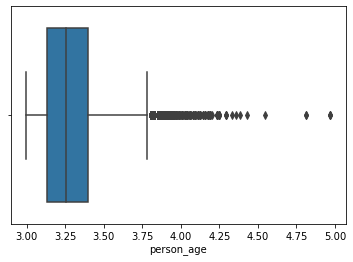

In [44]:
sns.boxplot(np.log(data.person_age))## logtransformation as 759 outliers

### cube root transformation

In [45]:
Q1,Q2,Q3=((data.person_age)**(1/3)).quantile(q=[0.25,0.50,0.75])
print(Q1,Q2,Q3)

2.8438669798515654 2.9624960684073702 3.1072325059538586


In [46]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.26336552610229313 3.502280795107298 2.4488186906981255


In [47]:
data[((data.person_age)**(1/3) > UL) | ((data.person_age)**(1/3)< LL)].index.value_counts()

81       1
31982    1
31933    1
31934    1
31935    1
        ..
30574    1
30580    1
30587    1
30592    1
32580    1
Length: 1063, dtype: int64

<AxesSubplot:xlabel='person_age'>

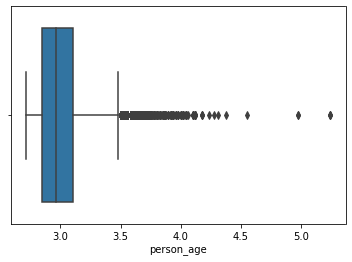

In [48]:
sns.boxplot((data.person_age)**(1/3)) ## cube root transformation as 1063 outliers

In [49]:
person_age_tran=np.log(data.person_age)

In [50]:
data["person_age_tran"]=np.log(data.person_age)

### Boxcox transformation

In [51]:
x=stats.boxcox(data.person_age)[0] 
y=pd.Series(x)

<AxesSubplot:>

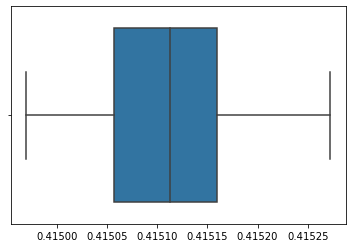

In [52]:
sns.boxplot(y)

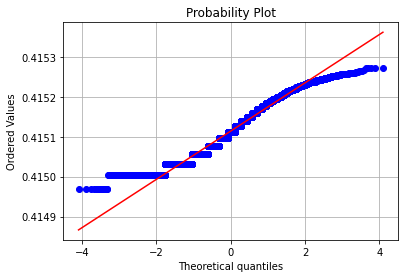

In [53]:
stats.probplot(y, dist="norm", plot=plt)

plt.grid();

In [54]:
Q1, Q2,Q3= (y.quantile(q = [0.25,0.5,0.75]))
print(Q1,Q2,Q3)

0.4150567062354287 0.4151125362646422 0.4151599217970655


In [55]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.00010321556163683798 0.41531474513952077 0.4149018828929734


In [56]:
data[((stats.boxcox(data.person_age)[0])> UL) | ((stats.boxcox(data.person_age)[0])< LL)].index.value_counts()

Series([], dtype: int64)

In [57]:
person_age_tran=stats.boxcox(data.person_age)[0]

In [58]:
data["person_age_tran"]=stats.boxcox(data.person_age)[0]

In [59]:
## person age column as no outliers if we use boxcox transformation

## outlier detection for the person_emp_length 

### logtransformation

In [60]:
Q1,Q2,Q3=(np.log(data.person_emp_length.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

0.6931471805599453 1.3862943611198906 1.9459101490553132


In [61]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

1.252762968495368 3.8250546017983655 -1.1859972721831067


In [62]:
data[(np.log(data.person_emp_length) > UL) | (np.log(data.person_emp_length)< LL)].index.value_counts()

0        1
21094    1
20994    1
20996    1
20998    1
        ..
9736     1
9763     1
9766     1
9771     1
32575    1
Length: 4088, dtype: int64

<AxesSubplot:xlabel='person_emp_length'>

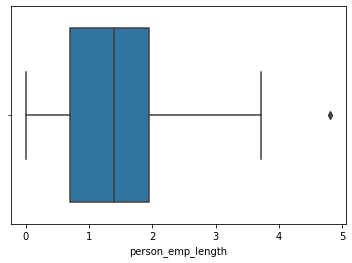

In [63]:
sns.boxplot(np.log(data.person_emp_length))

### cube root transformation

In [64]:
Q1,Q2,Q3=((data.person_emp_length)**(1/3)).quantile(q=[0.25,0.50,0.75])
print(Q1,Q2,Q3)

1.2599210498948732 1.5874010519681994 1.912931182772389


In [65]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.6530101328775157 2.8924463820886626 0.28040585057859957


In [66]:
data[((data.person_emp_length)**(1/3) > UL) | ((data.person_emp_length)**(1/3)< LL)].index.value_counts()

0        1
20897    1
21161    1
21165    1
21169    1
        ..
9840     1
9841     1
9843     1
9857     1
32575    1
Length: 4120, dtype: int64

<AxesSubplot:xlabel='person_emp_length'>

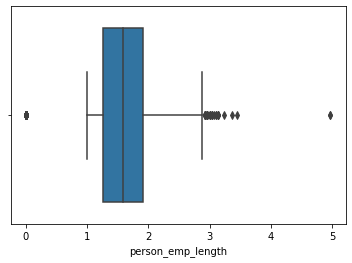

In [67]:
sns.boxplot((data.person_emp_length)**(1/3))

In [68]:
person_emp_tran=np.log(data.person_emp_length)

In [69]:
data["person_emp_tran"]=np.log(data.person_emp_length)#logtransformation shows the less outliers than the cube root transformation

## outliers detection for loan_amount

### logtransformation

In [70]:
Q1,Q2,Q3=(np.log(data.loan_amnt.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

8.517193191416238 8.987196820661973 9.413281215972873


In [71]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.8960880245566347 10.757413252807826 7.173061154581286


In [72]:
data[(np.log(data.loan_amnt) > UL) | (np.log(data.loan_amnt)< LL)].index.value_counts()

1        1
18605    1
18763    1
18762    1
18760    1
        ..
1499     1
1498     1
1497     1
1496     1
32425    1
Length: 509, dtype: int64

<AxesSubplot:xlabel='loan_amnt'>

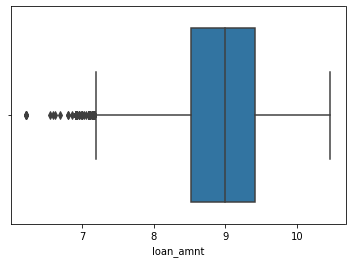

In [73]:
sns.boxplot(np.log(data.loan_amnt) )

### cuberoot transformation

In [74]:
Q1,Q2,Q3=((data.loan_amnt)**(1/3)).quantile(q=[0.25,0.50,0.75])
print(Q1,Q2,Q3)

17.09975946676697 19.999999999999996 23.05218146029223


In [75]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

5.95242199352526 31.98081445058012 8.17112647647908


In [76]:
data[((data.loan_amnt)**(1/3) > UL) | ((data.loan_amnt)**(1/3)< LL)].index.value_counts()

0        1
26932    1
26311    1
26444    1
26491    1
        ..
15792    1
15852    1
15866    1
15900    1
32578    1
Length: 203, dtype: int64

<AxesSubplot:xlabel='loan_amnt'>

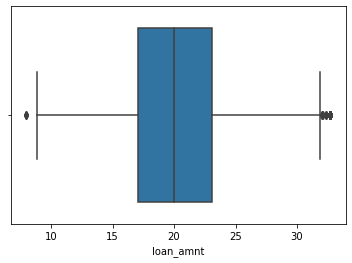

In [77]:
sns.boxplot((data.loan_amnt)**(1/3))

### Boxcox transformation

In [78]:
x=stats.boxcox(data.loan_amnt)[0]
y=pd.Series(x)

<AxesSubplot:>

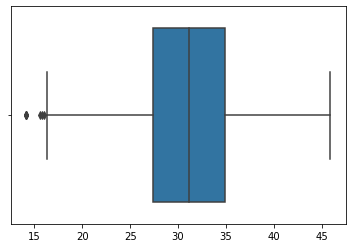

In [79]:
sns.boxplot(y)

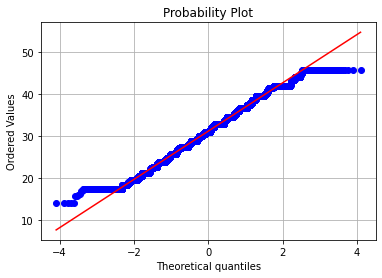

In [80]:
stats.probplot(y, dist="norm", plot=plt)

plt.grid();

In [81]:
Q1,Q2,Q3=(y.quantile([0.25,0.50,0.75]))
print(Q1,Q2,Q3)

27.406569824005185 31.12028449453712 34.862316083910095


In [82]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

7.45574625990491 46.04593547376746 16.22295043414782


In [83]:
data[(stats.boxcox(data.loan_amnt)[0]>UL)|(stats.boxcox(data.loan_amnt)[0]<LL)].index.value_counts()

871      1
873      1
875      1
1355     1
8607     1
15951    1
18502    1
18503    1
dtype: int64

In [84]:
loan_amt_tran=stats.boxcox(data.loan_amnt)[0]

In [85]:
data["loan_amt_tran"]=stats.boxcox(data.loan_amnt)[0]

In [86]:
## in loan amount boxcox as 8 outliers and cube root as 203 outliers

## Outlier detection for the loan_status

### logtransformation

In [87]:
Q1,Q2,Q3=(np.log(data.loan_int_rate.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

2.138889000323256 2.39698576841553 2.5733752977756086


In [88]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.4344862974523527 3.2251047439541374 1.487159554144727


In [89]:
data[(np.log(data.loan_amnt) > UL) | (np.log(data.loan_amnt)< LL)].index.value_counts()

0        1
21727    1
21740    1
21739    1
21738    1
        ..
10801    1
10800    1
10799    1
10798    1
32580    1
Length: 32416, dtype: int64

### cube root transformation

In [90]:
Q1,Q2,Q3=((data.loan_int_rate)**(1/3)).quantile(q=[0.25,0.50,0.75])
print(Q1,Q2,Q3)

2.040026912370836 2.223305952883101 2.3579480392365464


In [91]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.3179211268657105 2.8348297295351124 1.5631452220722701


In [92]:
data[((data.loan_int_rate)**(1/3) > UL) | ((data.loan_int_rate)**(1/3)< LL)].index.value_counts()

29277    1
dtype: int64

In [93]:
loan_int_tran=(data.loan_int_rate)**(1/3)

In [94]:
data["loan_int_tran"]=(data.loan_int_rate)**(1/3) #cuberoot transformation has less outliers than the logtransformation

### Boxcox transformamtion

In [95]:
x=stats.boxcox(data.loan_int_rate)[0]
y=pd.Series(x)

<AxesSubplot:>

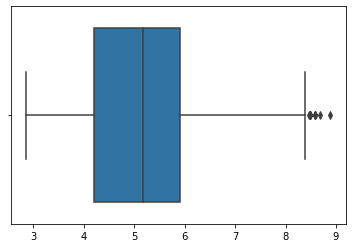

In [96]:
sns.boxplot(y)

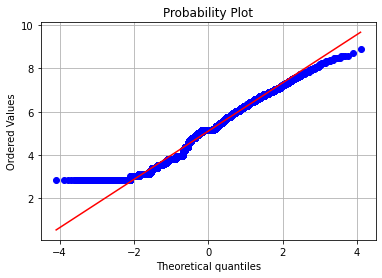

In [97]:
stats.probplot(y, dist="norm", plot=plt)

plt.grid();

In [98]:
Q1,Q2,Q3=(y.quantile([0.25,0.50,0.75]))
print(Q1,Q2,Q3)

4.214819209156517 5.168507733588348 5.9067817216676275


In [99]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

1.6919625125111102 8.444725490434292 1.676875440389852


In [100]:
data[(stats.boxcox(data.loan_int_rate)[0]>UL)|(stats.boxcox(data.loan_int_rate)[0]<LL)].index.value_counts()

2436     1
6449     1
7470     1
13499    1
15744    1
17103    1
17989    1
18829    1
27425    1
27633    1
27851    1
29277    1
dtype: int64

In [101]:
#cube root looks betteer for loan_int_rate column   cube root shows 1 outlier compared to boxcox transformatiom

## Outlier detection fot loan_percent_income

### log transformation

In [102]:
Q1,Q2,Q3=(np.log(data.loan_percent_income.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

-2.4079456086518722 -1.8971199848858813 -1.4696759700589417


In [103]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.9382696385929306 -0.06227151216954585 -3.815350066541268


In [104]:
data[(np.log(data.loan_percent_income) > UL) | (np.log(data.loan_percent_income)< LL)].index.value_counts()

81       1
22355    1
25688    1
25559    1
25356    1
        ..
13516    1
13505    1
13502    1
13450    1
32551    1
Length: 516, dtype: int64

### cube root transformation

In [105]:
Q1,Q2,Q3=((data.loan_percent_income)**(1/3)).quantile(q=[0.25,0.50,0.75])
print(Q1,Q2,Q3)

0.4481404746557165 0.5313292845913056 0.6126925675228417


In [106]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.16455209286712524 0.8595207068235295 0.20131233535502863


In [107]:
data[((data.loan_percent_income)**(1/3) > UL) | ((data.loan_percent_income)**(1/3)< LL)].index.value_counts()

460      1
493      1
17938    1
18082    1
18203    1
18204    1
18322    1
18672    1
18917    1
19657    1
23727    1
27877    1
27878    1
28724    1
30049    1
31916    1
31922    1
31924    1
32297    1
17834    1
15963    1
15950    1
1773     1
535      1
571      1
577      1
640      1
894      1
962      1
1348     1
2452     1
15921    1
2829     1
3535     1
5590     1
6758     1
10007    1
15044    1
15877    1
32546    1
dtype: int64

In [108]:
loan_percent_tran=(data.loan_percent_income)**(1/3)

In [109]:
data["loan_percent_tran"]=(data.loan_percent_income)**(1/3)

### Boxcox transformation

In [110]:
np.random.seed(2)
data.loan_percent_income = np.random.gamma(1, 1, size=32416)
data.loan_percent_income[100] = 0

In [111]:
posdata = data.loan_percent_income[data.loan_percent_income > 0]

## Outlier detection cred_hist_length

### log transformation

In [112]:
Q1,Q2,Q3=(np.log(data.cb_person_cred_hist_length.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

1.0986122886681098 1.3862943611198906 2.0794415416798357


In [113]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.980829253011726 3.5506854211974246 -0.37263159084947906


In [114]:
data[(np.log(data.cb_person_cred_hist_length) > UL) | (np.log(data.cb_person_cred_hist_length) < LL)].index.value_counts()

Series([], dtype: int64)

In [115]:
cred_hist_tran=np.log(data.cb_person_cred_hist_length)

In [116]:
data["cred_hist_tran"]=np.log(data.cb_person_cred_hist_length)

In [117]:
##log transformation looks better for the credit history length

In [118]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_income_tran,person_age_tran,person_emp_tran,loan_amt_tran,loan_int_tran,loan_percent_tran,cred_hist_tran
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.572692,Y,3,7.887024,0.415032,4.812184,45.860686,2.520892,0.838721,1.098612
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.026268,N,2,6.934408,0.415003,1.609438,17.403076,2.233375,0.464159,0.693147
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.797758,N,3,6.934408,0.415096,0.000000,28.126718,2.343471,0.829134,1.098612
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.571500,N,2,7.938554,0.415057,1.386294,45.860686,2.478753,0.809267,0.693147
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.545362,Y,4,7.846762,0.415078,2.079442,45.860686,2.425537,0.819321,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.667276,N,30,7.833786,0.415251,0.000000,28.535094,2.360942,0.479142,3.401197
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.194163,N,19,8.230377,0.415247,1.386294,38.369143,1.956563,0.531329,2.944439
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.474657,N,28,8.011272,0.415257,1.098612,45.860686,2.223306,0.771944,3.332205
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,3.273055,N,26,8.335110,0.415249,1.609438,36.777353,2.255869,0.464159,3.258097


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
 12  person_income_tran          32416 non-null  float64
 13  person_age_tran             324

In [120]:
X=data[["person_age_tran","person_income_tran","person_home_ownership","loan_intent","loan_grade","person_emp_length","loan_int_tran","loan_amt_tran","loan_percent_tran","cb_person_default_on_file","cred_hist_tran"]]
y=data["loan_status"]

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

### TRAIN DATASET

In [122]:
X_train_num=X_train.select_dtypes(include=["int64","float64"])
X_train_cat=X_train.select_dtypes(include=["object"])

In [123]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_ntran=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

In [124]:
X_train_ntran

,person_age_tran,person_income_tran,person_emp_length,loan_int_tran,loan_amt_tran,loan_percent_tran,cred_hist_tran
533,-0.589172,1.284901,0.054592,1.316540,1.600607,0.392800,-0.718479
5603,-1.807254,-0.350797,-1.179233,0.010275,0.562778,0.933175,-1.361317
14046,-1.337804,-1.021627,-1.179233,1.164748,-0.940956,-0.189785,-1.361317
23911,1.234256,-1.429764,-1.179233,-1.246522,0.318319,1.773713,1.023298
1243,-1.337804,-0.643536,-0.192173,0.261679,1.078020,1.876746,-0.718479
...,...,...,...,...,...,...,...
12119,-0.589172,0.651942,0.794888,-0.999041,1.281984,0.715204,-1.361317
24545,1.327857,0.151421,0.548123,0.128048,0.318319,0.214350,1.023298
14147,-0.935783,1.033873,-1.179233,-0.734009,-0.204479,-0.995316,-0.718479
23442,0.888408,0.223008,-1.179233,0.946901,-1.283335,-1.368230,0.091401


In [125]:
X_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
533,RENT,EDUCATION,D,Y
5603,MORTGAGE,PERSONAL,B,N
14046,OWN,DEBTCONSOLIDATION,D,Y
23911,RENT,MEDICAL,A,N
1243,RENT,VENTURE,C,Y
...,...,...,...,...
12119,MORTGAGE,HOMEIMPROVEMENT,A,N
24545,RENT,PERSONAL,B,N
14147,MORTGAGE,PERSONAL,A,N
23442,OWN,VENTURE,C,Y


### One Hot encoding(train data)

In [126]:
X_train_cat_one=pd.DataFrame(index=X_train_cat.index)
X_train_cat_one

""
533
5603
14046
23911
1243
...
12119
24545
14147
23442


In [127]:
X_train_cat_one["person_home_ownership"]=data.person_home_ownership
X_train_cat_one["loan_intent"]=data.loan_intent
X_train_cat_one["cb_person_default_on_file"]=data.cb_person_default_on_file

In [128]:
X_train_cat_one

,person_home_ownership,loan_intent,cb_person_default_on_file
533,RENT,EDUCATION,Y
5603,MORTGAGE,PERSONAL,N
14046,OWN,DEBTCONSOLIDATION,Y
23911,RENT,MEDICAL,N
1243,RENT,VENTURE,Y
...,...,...,...
12119,MORTGAGE,HOMEIMPROVEMENT,N
24545,RENT,PERSONAL,N
14147,MORTGAGE,PERSONAL,N
23442,OWN,VENTURE,Y


In [129]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop="first", sparse=False)
X_train_cat_one_tran=pd.DataFrame(encoder.fit_transform(X_train_cat_one),columns=encoder.get_feature_names_out(X_train_cat_one.columns),
                                  index=X_train_cat.index)


In [130]:
X_train_cat_one_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
533,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5603,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14046,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23911,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
12119,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24545,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14147,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23442,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### label encoding(test data)

In [131]:
X_train_cat_le=pd.DataFrame(index=X_train_cat.index)
X_train_cat_le

""
533
5603
14046
23911
1243
...
12119
24545
14147
23442


In [132]:
map_dict={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
X_train_cat_le["loan_grade"]=data["loan_grade"].apply(lambda x: map_dict[x])

In [133]:
X_train_cat_le

,loan_grade
533,4
5603,2
14046,4
23911,1
1243,3
...,...
12119,1
24545,2
14147,1
23442,3


In [134]:
X_train_cat_tran=pd.concat([X_train_cat_one_tran,X_train_cat_le],axis=1)
X_train_cat_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
533,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
5603,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
14046,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
23911,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...
12119,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
24545,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
14147,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
23442,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3


In [135]:
X_train_tran=pd.concat([X_train_cat_tran,X_train_ntran],axis=1)
X_train_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade,person_age_tran,person_income_tran,person_emp_length,loan_int_tran,loan_amt_tran,loan_percent_tran,cred_hist_tran
533,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4,-0.589172,1.284901,0.054592,1.316540,1.600607,0.392800,-0.718479
5603,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,-1.807254,-0.350797,-1.179233,0.010275,0.562778,0.933175,-1.361317
14046,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,-1.337804,-1.021627,-1.179233,1.164748,-0.940956,-0.189785,-1.361317
23911,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.234256,-1.429764,-1.179233,-1.246522,0.318319,1.773713,1.023298
1243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3,-1.337804,-0.643536,-0.192173,0.261679,1.078020,1.876746,-0.718479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,-0.589172,0.651942,0.794888,-0.999041,1.281984,0.715204,-1.361317
24545,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.327857,0.151421,0.548123,0.128048,0.318319,0.214350,1.023298
14147,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,-0.935783,1.033873,-1.179233,-0.734009,-0.204479,-0.995316,-0.718479
23442,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3,0.888408,0.223008,-1.179233,0.946901,-1.283335,-1.368230,0.091401


### TEST DATASET

In [136]:
X_test_num=X_test.select_dtypes(include=["int64","float64"])
X_test_cat=X_test.select_dtypes(include=["object"])

In [137]:
X_test_ntran=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

In [138]:
X_test_ntran

,person_age_tran,person_income_tran,person_emp_length,loan_int_tran,loan_amt_tran,loan_percent_tran,cred_hist_tran
25666,1.130781,1.195349,-0.438938,-0.018780,0.603054,-0.423789,0.091401
18151,0.888408,1.920462,2.522243,0.829230,0.318319,-1.171360,0.836560
24159,0.888408,0.420766,-0.192173,-1.407749,0.603054,0.214350,0.624855
57,-0.935783,2.709993,-0.438938,0.090142,2.546259,-0.189785,-0.262378
9770,-1.337804,-1.362723,-0.932468,-0.038242,0.159278,1.500148,-1.361317
...,...,...,...,...,...,...,...
15014,-0.589172,0.888078,0.794888,1.562720,0.968642,-0.081731,-1.361317
23449,1.016045,-1.943962,-0.932468,-1.534813,0.044117,1.976558,1.023298
14852,-1.337804,1.299346,0.301358,-1.403431,0.465637,-0.688186,-0.262378
32509,2.205059,0.946635,0.301358,0.273940,0.603054,-0.189785,2.289278


In [139]:
X_test_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
25666,RENT,HOMEIMPROVEMENT,B,N
18151,MORTGAGE,PERSONAL,C,Y
24159,MORTGAGE,MEDICAL,A,N
57,OWN,PERSONAL,A,N
9770,RENT,MEDICAL,C,N
...,...,...,...,...
15014,MORTGAGE,MEDICAL,D,Y
23449,RENT,PERSONAL,A,N
14852,MORTGAGE,EDUCATION,A,N
32509,MORTGAGE,PERSONAL,B,N


### One hot encoding (test data)

In [140]:
X_test_cat_one=pd.DataFrame(index=X_test_cat.index)
X_test_cat_one

""
25666
18151
24159
57
9770
...
15014
23449
14852
32509


In [141]:
X_test_cat_one["person_home_ownership"]=data.person_home_ownership
X_test_cat_one["loan_intent"]=data.loan_intent
X_test_cat_one["cb_person_default_on_file"]=data.cb_person_default_on_file

In [142]:
X_test_cat_one

,person_home_ownership,loan_intent,cb_person_default_on_file
25666,RENT,HOMEIMPROVEMENT,N
18151,MORTGAGE,PERSONAL,Y
24159,MORTGAGE,MEDICAL,N
57,OWN,PERSONAL,N
9770,RENT,MEDICAL,N
...,...,...,...
15014,MORTGAGE,MEDICAL,Y
23449,RENT,PERSONAL,N
14852,MORTGAGE,EDUCATION,N
32509,MORTGAGE,PERSONAL,N


In [143]:
X_test_cat_one_tran=pd.DataFrame(encoder.transform(X_test_cat_one),columns=encoder.get_feature_names_out(X_test_cat_one.columns),
                                  index=X_test_cat.index)


In [144]:
X_test_cat_one_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
25666,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
18151,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
24159,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
57,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9770,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15014,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
23449,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14852,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Labelencoding (testdata)

In [145]:
X_test_cat_le=pd.DataFrame(index=X_test_cat.index)
X_test_cat_le

""
25666
18151
24159
57
9770
...
15014
23449
14852
32509


In [146]:
map_dict={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
X_test_cat_le["loan_grade"]=data["loan_grade"].apply(lambda x: map_dict[x])

In [147]:
X_test_cat_le

,loan_grade
25666,2
18151,3
24159,1
57,1
9770,3
...,...
15014,4
23449,1
14852,1
32509,2


In [148]:
X_test_cat_tran=pd.concat([X_test_cat_one_tran,X_test_cat_le],axis=1)
X_test_cat_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
25666,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2
18151,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3
24159,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
57,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
9770,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...
15014,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4
23449,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
14852,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
32509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


In [149]:
X_test_tran=pd.concat([X_test_cat_tran,X_test_ntran],axis=1)
X_test_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade,person_age_tran,person_income_tran,person_emp_length,loan_int_tran,loan_amt_tran,loan_percent_tran,cred_hist_tran
25666,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1.130781,1.195349,-0.438938,-0.018780,0.603054,-0.423789,0.091401
18151,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3,0.888408,1.920462,2.522243,0.829230,0.318319,-1.171360,0.836560
24159,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.888408,0.420766,-0.192173,-1.407749,0.603054,0.214350,0.624855
57,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,-0.935783,2.709993,-0.438938,0.090142,2.546259,-0.189785,-0.262378
9770,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3,-1.337804,-1.362723,-0.932468,-0.038242,0.159278,1.500148,-1.361317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15014,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4,-0.589172,0.888078,0.794888,1.562720,0.968642,-0.081731,-1.361317
23449,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1.016045,-1.943962,-0.932468,-1.534813,0.044117,1.976558,1.023298
14852,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,-1.337804,1.299346,0.301358,-1.403431,0.465637,-0.688186,-0.262378
32509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2.205059,0.946635,0.301358,0.273940,0.603054,-0.189785,2.289278


## LogisticRegression

In [150]:
from sklearn.linear_model import LogisticRegression
linear=LogisticRegression()
linear.fit(X_train_tran,y_train)

LogisticRegression()

In [151]:
y_test_pred=linear.predict(X_test_tran)

In [152]:
from sklearn import metrics
linear_acc=metrics.accuracy_score(y_test,y_test_pred)
linear_acc

0.8470080197409007


### KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier
neighbour=KNeighborsClassifier()
neighbour.fit(X_train_tran,y_train)

KNeighborsClassifier()

In [154]:
y_test_pred=neighbour.predict(X_test_tran)

In [155]:
neighbour_acc=metrics.accuracy_score(y_test,y_test_pred)
neighbour_acc

0.8891116594694632

### Decision tree

In [156]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train_tran,y_train)

DecisionTreeClassifier()

In [157]:
y_test_pred=tree.predict(X_test_tran)

In [158]:
tree_Acc=metrics.accuracy_score(y_test,y_test_pred)
tree_Acc

0.8895743368291178

### Random forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
ensemble=RandomForestClassifier()
ensemble.fit(X_train_tran,y_train)

RandomForestClassifier()

In [160]:
y_test_pred=ensemble.predict(X_test_tran)

In [161]:
ensemble_acc=metrics.accuracy_score(y_test,y_test_pred)
ensemble_acc

0.9304441702652684

### Support vector machine

In [162]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_tran,y_train)

SVC()

In [163]:
y_test_pred=svm.predict(X_test_tran)

In [164]:
svm_acc=metrics.accuracy_score(y_test,y_test_pred)
svm_acc

0.9090067859346083

In [165]:
data_df=pd.DataFrame({"Algorithms":["Logisticregression","KNN","Decisontree","Randomforest","Supportvectormachine"],
                     "Accuracy_score":[linear_acc,neighbour_acc,tree_Acc,ensemble_acc,svm_acc]})

In [166]:
data_df

,Algorithms,Accuracy_score
0,Logisticregression,0.847008
1,KNN,0.889112
2,Decisontree,0.889574
3,Randomforest,0.930444
4,Supportvectormachine,0.909007
